___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Car Price Prediction Project

# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows =500
pd.options.display.max_columns = 500

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15914 non-null  object 
 1   body_type            15914 non-null  object 
 2   price                15914 non-null  int64  
 3   km                   15914 non-null  float64
 4   type                 15914 non-null  object 
 5   previous_owners      15914 non-null  int64  
 6   inspection_new       15914 non-null  int64  
 7   paint_type           15914 non-null  object 
 8   nr_of_doors          15914 non-null  int64  
 9   nr_of_seats          15914 non-null  int64  
 10  gearing_type         15914 non-null  object 
 11  drive_chain          15914 non-null  object 
 12  fuel                 15914 non-null  object 
 13  co2_emission         15914 non-null  float64
 14  emission_class       15914 non-null  object 
 15  comfort_convenience  15914 non-null 

In [3]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.000,80000.000,83450.000,73000.000,16200.000
type,Used,Used,Used,Used,Used
previous_owners,2,1,1,1,1
inspection_new,1,0,0,0,1
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
nr_of_doors,5,3,4,3,5
nr_of_seats,5,4,4,4,5


In [4]:
df.describe()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,co2_emission,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
count,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000
mean,18023.741,32091.773,1.040,0.247,4.660,4.950,117.793,5.938,1.390,88.501,18.505,1428.416,1344.235,4.830
std,7381.470,36977.275,0.254,0.431,0.641,0.472,18.124,0.705,1.121,26.658,10.437,277.398,204.986,0.925
min,4950.000,0.000,0.000,0.000,2.000,2.000,36.000,5.000,0.000,51.000,1.000,890.000,840.000,3.000
25%,12850.000,2001.000,1.000,0.000,4.000,5.000,104.000,5.000,0.000,66.000,12.000,1229.000,1165.000,4.100
50%,16900.000,20411.500,1.000,0.000,5.000,5.000,117.000,6.000,1.000,85.000,12.000,1461.000,1308.000,4.800
75%,21900.000,46900.000,1.000,0.000,5.000,5.000,128.000,6.000,2.000,101.000,24.000,1598.000,1468.750,5.400
max,74600.000,317000.000,4.000,1.000,5.000,7.000,331.000,8.000,3.000,294.000,72.000,2967.000,2471.000,11.000


## Feature Engineering

In [5]:
df.select_dtypes("object").head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
type,Used,Used,Used,Used,Used
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
gearing_type,Automatic,Automatic,Automatic,Automatic,Automatic
drive_chain,front,front,front,front,front
fuel,diesel,benzine,diesel,diesel,diesel
emission_class,Euro 6,Euro 6,Euro 6,Euro 6,Euro 6
comfort_convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."
entertainment_media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O..."


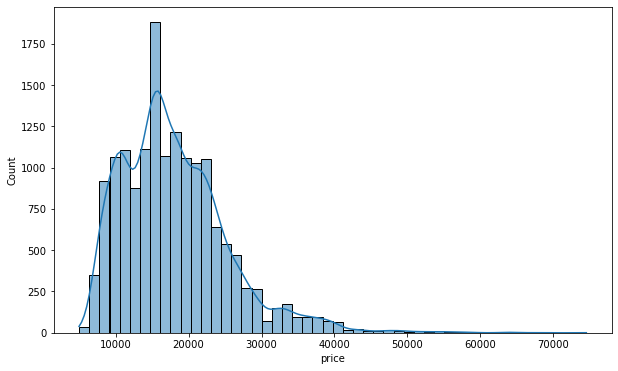

In [6]:
sns.histplot(df.price, bins=50, kde=True);

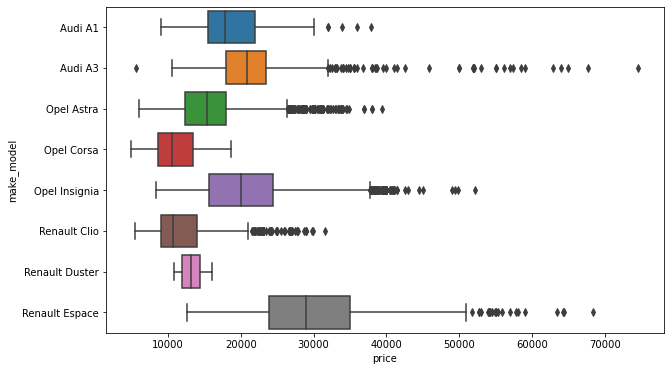

In [7]:
sns.boxplot(df.price, df.make_model);

In [8]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,co2_emission,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
0,15770,56013.000,2,1,5,5,99.000,7.000,3,66.000,12,1422.000,1220.000,3.800
1,14500,80000.000,1,0,3,4,129.000,7.000,2,141.000,12,1798.000,1255.000,5.600
2,14640,83450.000,1,0,4,4,99.000,7.000,3,85.000,12,1598.000,1225.000,3.800
3,14500,73000.000,1,0,3,4,99.000,6.000,3,66.000,12,1422.000,1195.000,3.800
4,16790,16200.000,1,1,5,5,109.000,7.000,3,66.000,12,1422.000,1195.000,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,39950,1652.171,1,0,5,5,139.000,6.000,0,147.000,24,1997.000,1758.000,5.300
15910,39885,9900.000,1,0,5,5,168.000,7.000,0,165.000,36,1798.000,1708.000,7.400
15911,39875,15.000,1,1,5,7,139.000,6.000,0,146.000,36,1997.000,1779.000,5.300
15912,39700,10.000,1,0,5,7,139.000,6.000,0,147.000,36,1997.000,1758.000,5.300


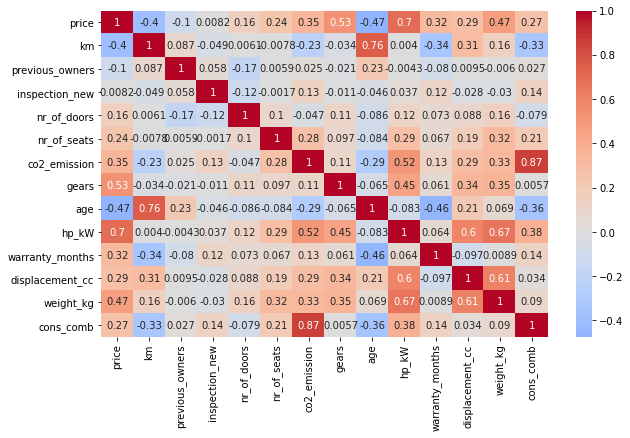

In [9]:
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", center=0);

## Dummy version

In [10]:
df = pd.read_csv("final_scout_dummy.csv")

In [11]:
df.corr()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,co2_emission,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb,cc_-,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,type_Employee's car,type_New,type_Pre-registered,type_Used,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_LPG,fuel_benzine,fuel_diesel,emission_class_Euro 5,emission_class_Euro 6
price,1.000,-0.399,-0.101,0.008,0.160,0.242,0.346,0.533,-0.473,0.697,0.318,0.285,0.474,0.270,-0.058,0.078,0.057,0.278,0.396,0.046,0.124,-0.006,0.284,0.036,0.253,0.123,0.329,0.138,0.033,0.247,0.030,0.198,0.297,0.195,0.276,0.117,0.313,0.219,0.348,0.313,0.279,0.313,0.287,0.026,0.336,0.276,0.190,0.002,0.209,0.165,0.030,0.007,0.007,0.058,-0.104,0.251,0.103,-0.022,-0.077,0.037,0.148,0.036,-0.019,0.212,0.008,0.043,0.012,-0.005,0.026,0.142,0.033,0.024,0.115,0.129,0.166,0.133,0.021,0.016,0.150,-0.021,-0.032,0.255,0.231,0.048,0.373,-0.044,-0.070,0.010,0.091,0.018,0.007,0.343,0.065,-0.043,-0.034,0.083,-0.046,0.132,0.435,0.380,0.069,0.005,-0.047,0.003,0.007,0.022,0.076,0.351,0.184,0.198,-0.128,-0.379,0.206,-0.298,-0.030,0.421,0.030,-0.020,-0.009,-0.055,0.045,-0.013,0.395,0.013,0.266,0.113,-0.366,-0.007,-0.016,-0.432,0.123,-0.156,-0.006,-0.014,-0.018,0.019,-0.053,0.061
km,-0.399,1.000,0.087,-0.049,0.006,-0.008,-0.230,-0.034,0.758,0.004,-0.343,0.305,0.158,-0.327,0.042,-0.007,0.026,0.043,0.011,0.059,0.005,0.019,0.016,-0.063,0.137,-0.071,-0.041,-0.111,-0.096,-0.043,0.029,-0.049,-0.103,0.051,-0.036,-0.042,0.066,0.047,-0.085,-0.068,-0.034,-0.016,-0.045,-0.032,-0.080,-0.075,0.059,0.116,-0.009,0.045,0.059,0.027,0.009,-0.034,0.146,-0.047,-0.100,-0.036,0.080,-0.016,0.019,0.022,-0.057,-0.093,-0.022,-0.081,0.019,0.011,0.160,-0.015,0.019,-0.003,0.058,0.012,-0.

In [12]:
price_corr = df.corr()["price"]

''

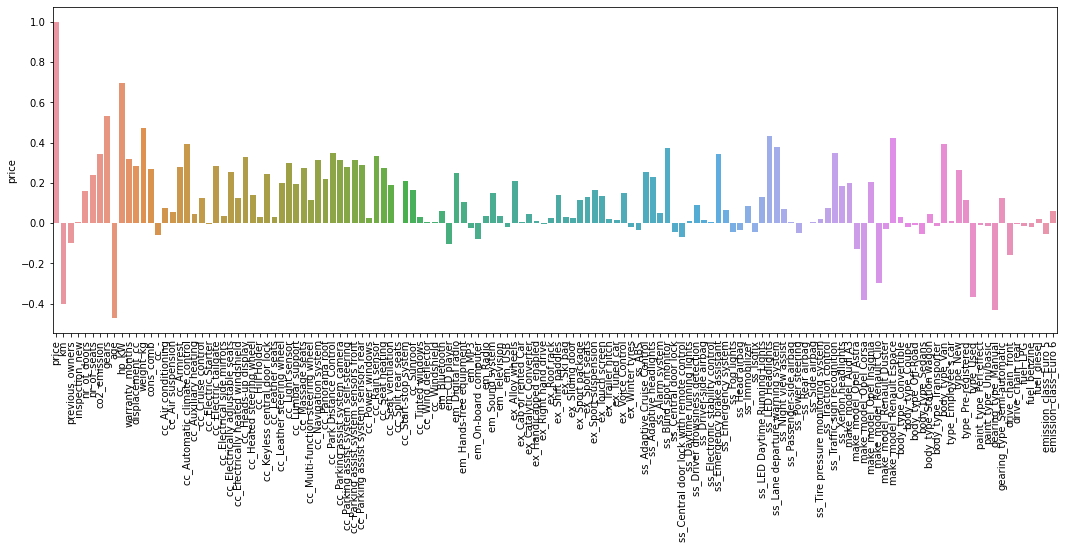

In [13]:
plt.figure(figsize=(18,6))
sns.barplot(price_corr.index, price_corr)
plt.xticks(rotation=90)
;

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

In [15]:
X = df.drop(columns="price")
y = df.price

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [20]:
def interpret_model(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {
    name+"_train": {"R2" : r2_score(y_train, y_train_pred),
                    "mae" : mean_absolute_error(y_train, y_train_pred),
                    "mse" : mean_squared_error(y_train, y_train_pred),                          
                    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
                    "mae" : mean_absolute_error(y_test, y_pred),
                    "mse" : mean_squared_error(y_test, y_pred),
                    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }
    
    return pd.DataFrame(scores)

In [21]:
ls = interpret_model(y_train, y_train_pred, y_test, y_pred, "lm")
ls

,lm_train,lm_test
R2,0.895,0.885
mae,1668.085,1721.188
mse,5697137.052,6396984.751
rmse,2386.868,2529.226


In [22]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring =["r2","neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                       cv=10)


In [23]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.105,0.012,0.900,-1666.027,-5383009.971,-2320.131
1,0.094,0.007,0.879,-1793.923,-7073915.469,-2659.683
2,0.092,0.011,0.898,-1632.649,-5185728.857,-2277.220
3,0.088,0.012,0.877,-1712.830,-6049239.023,-2459.520
4,0.089,0.009,0.882,-1702.266,-5855820.077,-2419.880
5,0.088,0.010,0.894,-1654.004,-5063068.058,-2250.126
6,0.087,0.010,0.891,-1677.539,-6465305.108,-2542.696
7,0.101,0.011,0.897,-1779.757,-6757615.414,-2599.541
8,0.082,0.011,0.896,-1675.813,-5808369.479,-2410.056
9,0.087,0.010,0.885,-1655.703,-5639325.297,-2374.726


In [24]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [25]:
from yellowbrick.regressor import PredictionError

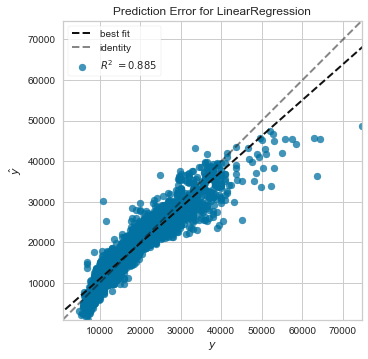

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
visualizer = PredictionError(lm)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [27]:
pd.DataFrame(lm.coef_, index= X.columns,columns=["Coef"] ).sort_values("Coef")

,Coef
make_model_Renault Duster,-12602.279
fuel_benzine,-9089.279
fuel_LPG,-8681.733
fuel_diesel,-8081.313
make_model_Renault Clio,-5581.594
make_model_Opel Corsa,-5106.152
drive_chain_rear,-4420.395
make_model_Opel Astra,-3842.091
type_Employee's car,-2896.428
type_Used,-2786.200


In [28]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Implement Ridge Regression

In [30]:
from sklearn.linear_model import Ridge, RidgeCV

In [31]:
ridge_model = Ridge()

In [32]:
ridge_model.fit(X_train, y_train)

Ridge()

In [33]:
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

In [35]:
rs = interpret_model(y_train, y_train_pred, y_test, y_pred, "ridge")
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
R2,0.895,0.885,0.894,0.885
mae,1668.085,1721.188,1667.711,1719.058
mse,5697137.052,6396984.751,5706989.192,6386253.357
rmse,2386.868,2529.226,2388.931,2527.104


In [38]:
arralpha = np.linspace(0.1, 100, 100)
ridgecv_model = RidgeCV(alphas=arralpha, 
                        scoring="neg_root_mean_squared_error",
                        cv=10)
ridgecv_model.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
         4.13636364,   5.14545455,   6.15454545,   7.16363636,
         8.17272727,   9.18181818,  10.19090909,  11.2       ,
        12.20909091,  13.21818182,  14.22727273,  15.23636364,
        16.24545455,  17.25454545,  18.26363636,  19.27272727,
        20.28181818,  21.29090909,  22.3       ,  23.30909091,
        24.31818182,  25.32727273,  26.33636364,  27.34545455,
        28.35454545,  29.36363636...
        72.75454545,  73.76363636,  74.77272727,  75.78181818,
        76.79090909,  77.8       ,  78.80909091,  79.81818182,
        80.82727273,  81.83636364,  82.84545455,  83.85454545,
        84.86363636,  85.87272727,  86.88181818,  87.89090909,
        88.9       ,  89.90909091,  90.91818182,  91.92727273,
        92.93636364,  93.94545455,  94.95454545,  95.96363636,
        96.97272727,  97.98181818,  98.99090909, 100.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [41]:
ridgecv_model.alpha_

1.1090909090909091

In [42]:
y_pred = ridgecv_model.predict(X_test)
y_train_pred = ridgecv_model.predict(X_train)

In [43]:
rcv = interpret_model(y_train, y_train_pred, y_test, y_pred, "ridgeCV")
pd.concat([ls,rs,rcv], axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test
R2,0.895,0.885,0.894,0.885,0.894,0.885
mae,1668.085,1721.188,1667.711,1719.058,1667.670,1718.973
mse,5697137.052,6396984.751,5706989.192,6386253.357,5708262.055,6387576.466
rmse,2386.868,2529.226,2388.931,2527.104,2389.197,2527.366


## 5. Implement Lasso Regression

## 6. Implement Elastic-Net

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___